# Homography Matrix and Texture Metrics

Introducing the dynamic duo of computer vision: Homography Matrix and Texture Metrics! These super-powered concepts may sound like they belong in a sci-fi movie, but in reality, they are the secret weapons behind some of the most mind-boggling image transformations and analysis. Picture this: Homography Matrix swoops in, effortlessly warping and morphing images with its mathematical might, while Texture Metrics dons its investigative cape, unravelling the intricate details that make images uniquely captivating. Together, they form an unstoppable team, taking us on an exciting journey through the realm of visual perception. So buckle up, fellow explorers, as we dive headfirst into the world of Homography Matrix and Texture Metrics, where pixels meet magic and pixels meet meaning!

In our previous discussions, we delved into the fundamental aspects of reading, cleaning, and detecting points of interest within our image. If you haven't visited my introduction to image processing blog series, click [HERE](https://medium.com/@vjlglopez)! Now, in this installment, we are ready to venture into a realm of special techniques, where we will unleash transformative powers and unleash the ability to generate captivating features from our very own image. Brace yourself for an extraordinary journey as we dive into the application of these unique methods.

## Homography Matrix

Homography, in the realm of computer vision, refers to the fascinating mapping between two planar projections of an image. It can be visualized as a mathematical transformation that captures the relationship between corresponding points in two different views of a scene. Encoded within a 3x3 transformation matrix, residing in the realm of homogeneous coordinates, the power of homography encompasses a variety of geometric operations. This includes the ability to seamlessly combine rotation, translation, scaling, and even skew operations. Essentially, homography opens the door to incredible image warping possibilities, allowing us to stretch, distort, or morph images in mesmerizing ways, all while preserving the intrinsic geometry and visual integrity.

The skimage documentation provides a concise summary of the various transformations, which can be found at the following link: https://scikit-image.org/docs/stable/auto_examples/transform/plot_transform_types.html. However, the examples in the documentation explicitly define the transform. But what if we are presented with the input and output images instead? In such cases, the number of points required to compute the homography matrix would depend on the specific transform being applied. To explore this further, let's delve into an exercise and see how it unfolds.

For our example, we are going to use the image of a Harry Potter book from:
https://www.thelondoneconomic.com/film/harry-potter-first-edition-bought-for-1-at-table-top-sale-set-to-fetch-magic-fee-140980/

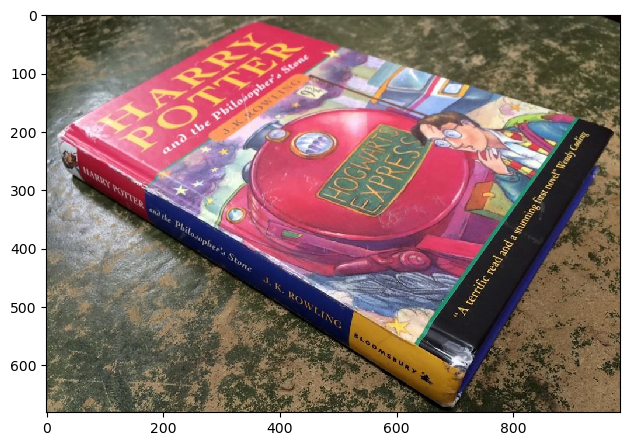

In [52]:
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
import numpy as np


book = imread('Harry_Potter_Book.JPG')
imshow(book);

To achieve a top-down view of the Harry Potter book, we need to compute the homography matrix using pre-determined corner points. By accurately identifying the corners of the book, we can establish the necessary correspondences between the source (book) image and the desired output (intermediate pad paper) view. These corner points serve as the key input for calculating the homography matrix, enabling us to perform the transformation required to obtain the desired perspective. With this calculated matrix in hand, we can unlock the power to seamlessly convert the book image into a captivating top-down view, bringing a whole new dimension to the game.

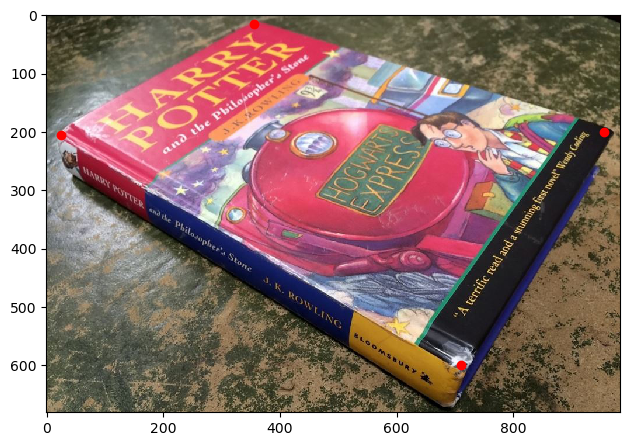

In [74]:
imshow(book);

src = np.array([25, 205, # left dot
                355, 15, # top dot
                710, 600, # bottom dot
                955, 200, # right dot
]).reshape((4, 2))

plt.scatter(src[:,0], src[:,1], color='red');

We make sure that the dots assigned to the src or source is arranged the way we assign it to our destination. This is to preserve the source image as we defined it.

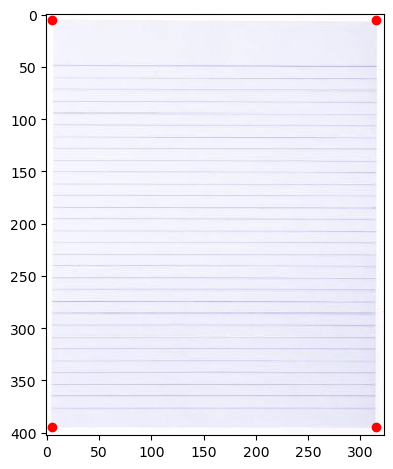

In [75]:
paper = imread('paper.JPG')
imshow(paper)

dst = np.array([5, 5,
                315, 5,
                5, 395,
                315, 395,
]).reshape((4, 2))

plt.scatter(dst[:,0], dst[:,1], color='red');

Since we know that the transformation we require is projective in nature, we can utilize this valuable information as a parameter for our computations. The projective transformation, represented by the homography matrix, allows us to map the corners of the book from their original perspective to a desired top-down view.

In [76]:
from skimage import transform
tform = transform.estimate_transform('projective', src, dst)

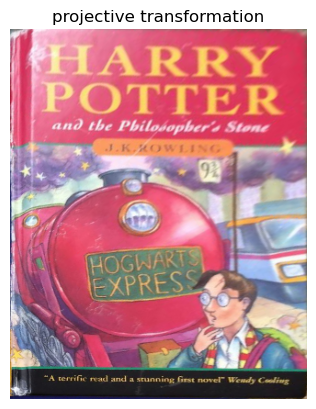

In [79]:
tform = transform.estimate_transform('projective', src, dst)
output_shape = paper.shape
tf_img = transform.warp(book, tform.inverse, output_shape=output_shape)

fig, ax = plt.subplots()
ax.imshow(tf_img)
_ = ax.set_title('projective transformation')
ax.axis('off');

By leveraging the projective nature of the transformation, we ensured that the resulting image maintains the appropriate geometric relationships and perspective, creating an accurate representation of the book from a bird's-eye view.

## Texture Metrics

Texture metrics are measures that capture the spatial arrangement or patterns of intensity values within an image. They serve as an alternative approach to characterizing images when color information is inconsistent or unreliable due to factors like white balancing or color variations. Similar to spatial filters, texture metrics analyze the distribution of intensity values in an image, focusing on the arrangement of these values rather than their absolute magnitudes.

To compute texture metrics, the following steps are typically followed:

1. A moving window, also known as a neighborhood or kernel, is defined and moved across the image.
2. Within each window, the occurrence histogram of gray levels (intensity values) is computed. This histogram represents the frequency of each gray level in the window.
3. A probability array is calculated based on the occurrence histogram. The probability of each gray level occurring in the window is determined.
4. Finally, a specific texture metric is computed based on the probability array. The choice of texture metric depends on the specific application or analysis being performed.

By applying this method, a texture metric is assigned to the center of each moving window. To obtain a comprehensive understanding of the texture distribution across the entire image, the moving window is iterated across the entire image, calculating the texture metric for each position.

Texture metrics provide valuable information about the spatial patterns present in an image. They can be used in various applications, such as image analysis, computer vision, and texture classification. These metrics enable the quantification and comparison of textures, aiding in tasks such as image segmentation, object recognition, and anomaly detection.

If you're interested in exploring the concept of entropy, which is commonly used in texture analysis, you can refer to the link provided (https://scikit-image.org/docs/dev/auto_examples/filters/plot_entropy.html) for more in-depth information.

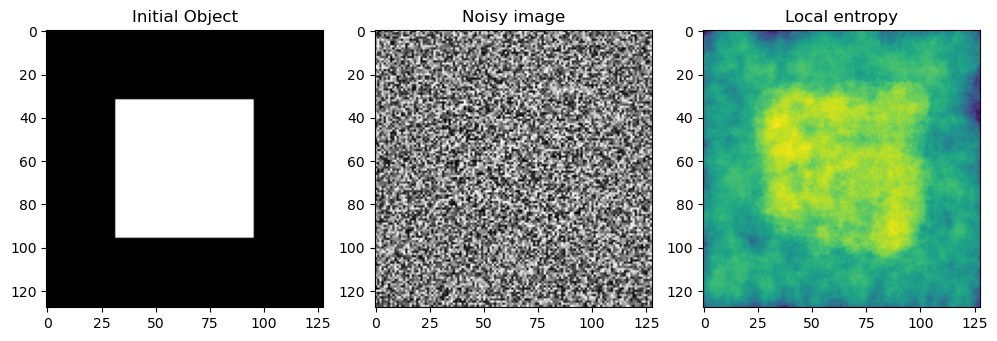

In [81]:
import skimage
from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk

noise_mask = np.full((128, 128), 28, dtype=np.uint8)

noise_mask[32:-32, 32:-32] = 30

noise = (noise_mask * np.random.random(noise_mask.shape) - 0.5 *
         noise_mask).astype(np.uint8)

img = noise + 128

entr_img = entropy(img, disk(10))

fig, ax = plt.subplots(1, 3, figsize=(10, 4))

ax[0].set_title("Initial Object")
ax[0].imshow(noise_mask, cmap='gray')

ax[1].set_title("Noisy image")
ax[1].imshow(img, cmap='gray')

ax[2].set_title("Local entropy")
ax[2].imshow(entr_img, cmap='viridis')

fig.tight_layout()

Now an example of where we can use this is in segmenting the buildings and the damaged areas from this typhoon struck satellite image.

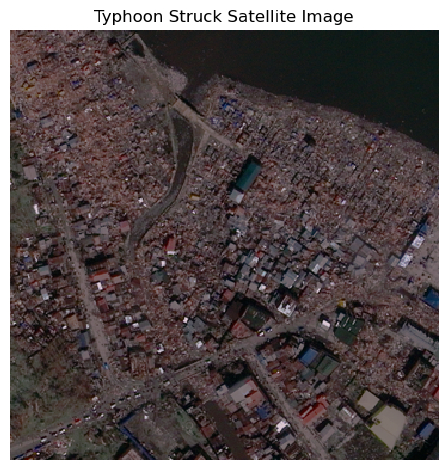

In [482]:
sat = imread('sat.png')[:, :, :-1]
plt.title('Typhoon Struck Satellite Image')
plt.axis('off')
imshow(sat);

We are going to compute for the entropy for each iteration of the value we set for the threshold.

The entropy can be calculated using the formula:

$$E = -\sum{p_i \log{p_i}}$$

`u_P_b`: represents the probability of one outcome (e.g., "success" or "black") in the binary variable or distribution.

`u_P_w`: represents the probability of the other outcome (e.g., "failure" or "white") in the binary variable or distribution.

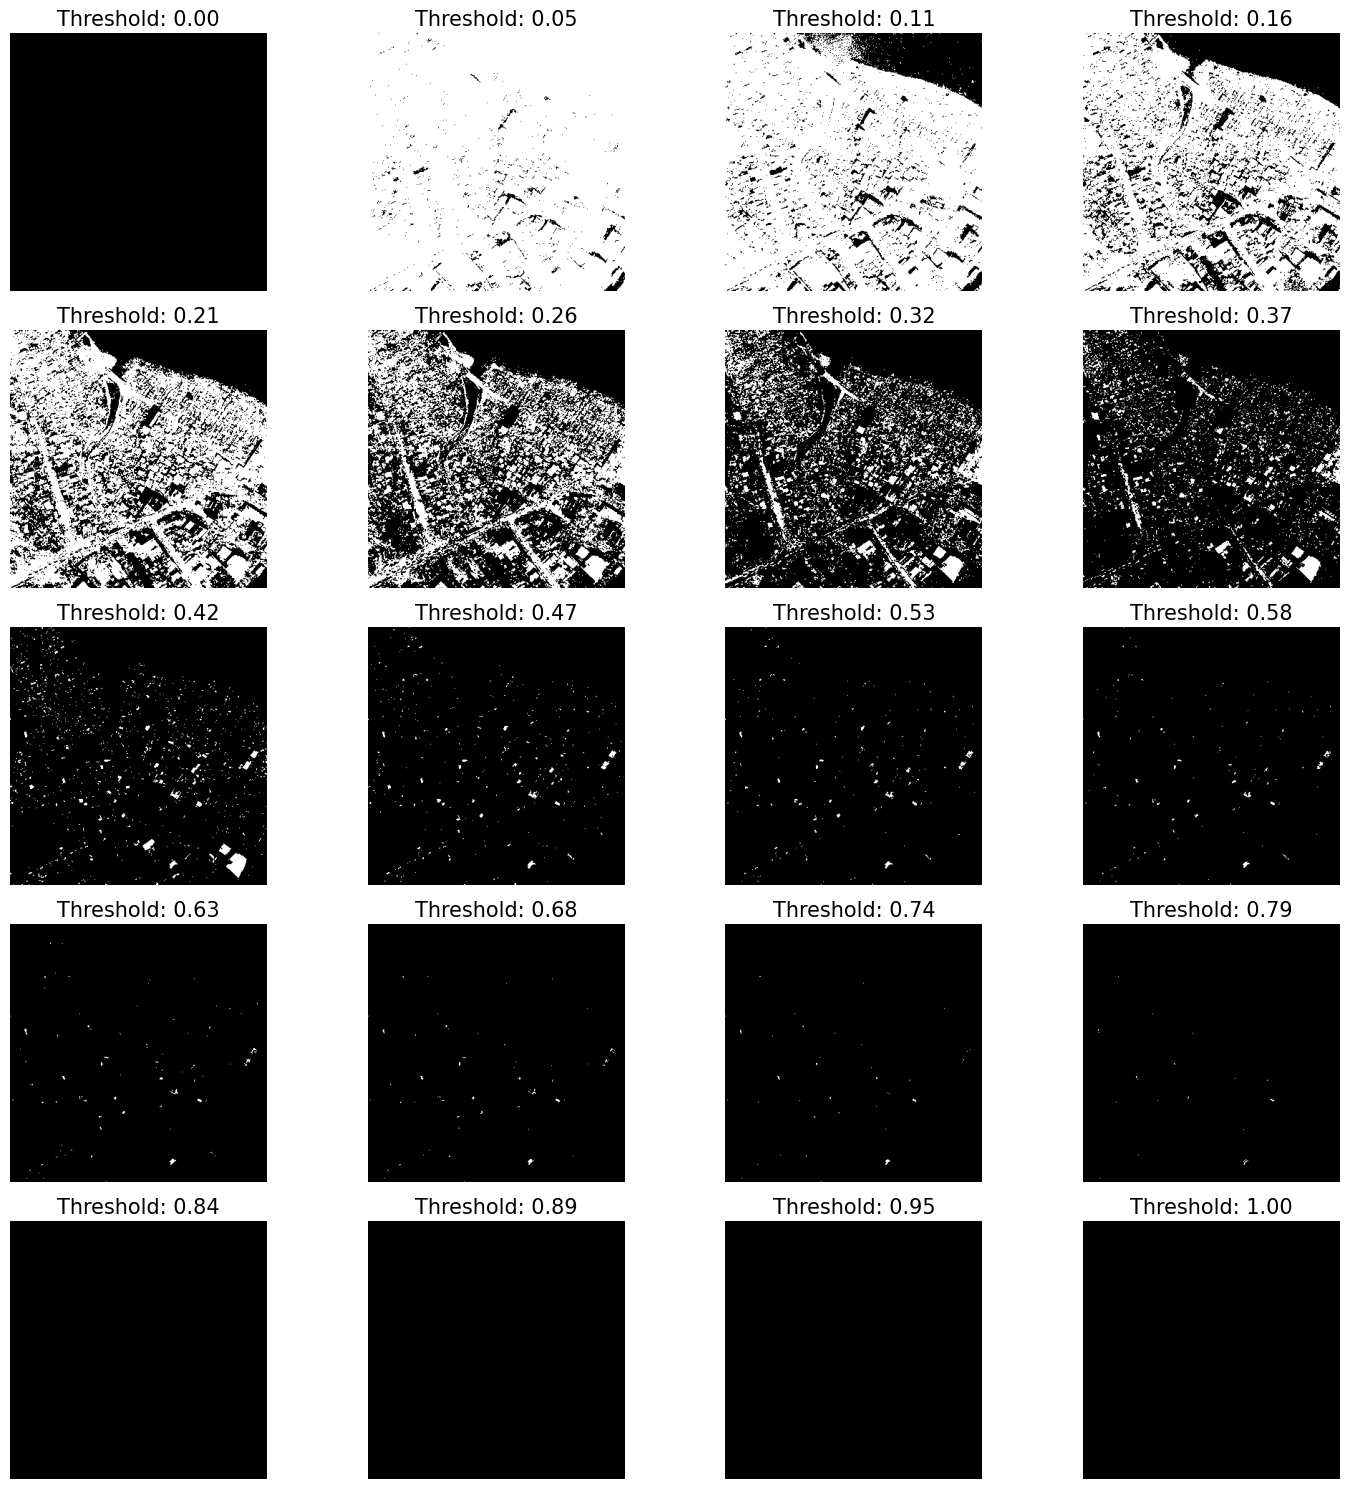

In [476]:
sat_c = skimage.color.rgb2gray(sat)
Es_sat = []

fig, ax = plt.subplots(5, 4, figsize=(15, 15))
ax = ax.flatten()

for k, i in enumerate(np.linspace(0, 1, 20)):
    sat_bw = sat_c > i
    ax[k].imshow(sat_bw, cmap='gray')
    ax[k].axis('off')
    ax[k].set_title(f'Threshold: {i:.2f}', fontsize=15)
    u_P_b = sum(sat_bw.flatten()) / len(sat_bw.flatten())
    u_P_w = 1 - u_P_b
    if u_P_b == 0 or u_P_b == 1:
        E_sat = 0
    else:
        E_sat = - (u_P_b * np.log(u_P_b) + u_P_w * np.log(u_P_w))
    Es_sat.append(E_sat)

plt.tight_layout()
plt.show()

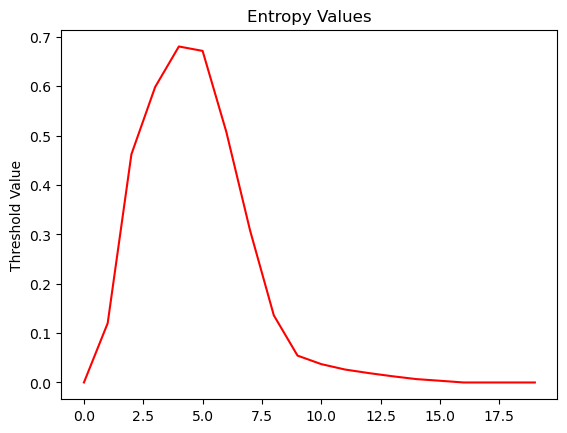

In [481]:
Es_sat = np.array(Es_sat)
plt.plot(Es_sat, 'red')
plt.title('Entropy Values')
plt.ylabel('Threshold Value');

The determination of the threshold value is based on a heuristic approach. So for our example, we are going to get the threshold value where the maximum entropy score is.

The threshold is: 0.21
Entropy Value of 0.68


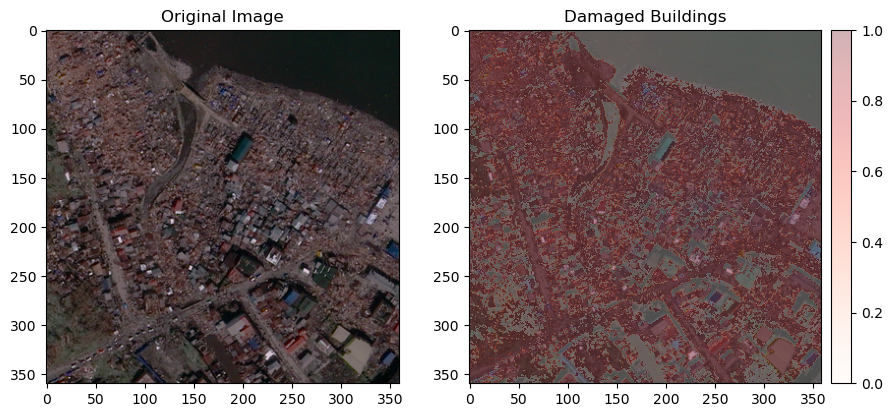

In [483]:
threshold = np.linspace(0, 1, 20)[Es_sat.argmax()]
print(f'The threshold is: {threshold:.2f}')

sat = imread('sat.png')[:, :, :-1]

sat_bw = skimage.color.rgb2gray(sat) > threshold

satP_b = sum(sat_bw.flatten())/len(sat_bw.flatten())
satP_w = (len(sat_bw.flatten())-sum(sat_bw.flatten()))/len(sat_bw.flatten())
satE_dm = - (satP_b * np.log(satP_b) + satP_w * np.log(satP_w))

print(f'Entropy Value of {satE_dm:.2f}')

fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].set_title('Original Image')
ax[0].imshow(sat)
ax[1].set_title('Damaged Buildings')
ax[1].imshow(sat)
ax[1].imshow(sat_bw, cmap='Reds', alpha=0.3)
cax = fig.add_axes([ax[1].get_position().x1+0.01,
                    ax[1].get_position().y0,0.02,
                    ax[1].get_position().height])
fig.colorbar(entropy_val, cax=cax)

plt.show()

In these images, the damaged buildings are distinguished by the highlighting in red, while the undamaged buildings remain unhighlighted. By leveraging on entropy as a texture metric, we successfully segmented the damaged buildings from the undamaged ones. The higher entropy value in the areas of damage suggests a greater degree of randomness or unpredictability in the texture, likely due to the destruction or alteration caused by the incident.

As we come to the end of this thrilling journey through the world of Homography Matrix and Texture Metrics, we have witnessed their remarkable power in image transformation and analysis. The Homography Matrix has granted us the ability to effortlessly warp and morph images, unveiling new perspectives and dimensions. Meanwhile, Texture Metrics have provided insights into the intricate patterns and spatial arrangements within images, offering valuable information for various applications. From generating captivating features to achieving top-down views and segmenting damaged areas, these concepts have demonstrated their versatility and practicality in computer vision.